# Muni Shaming: Machine Learning Component

The code here cleans the muni data, and performs machine learning on the data

### Set-up

In [234]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import datetime

 ### Data Preprocessing - json

In [235]:
# convert the jason file to a python dictionary

muni_file = "MUNI-Stop-prediction.json"
with open(muni_file,"r") as f:
    muni_json = json.load(f)

In [236]:
# capture metadata

ResponseTimestamp = muni_json["ServiceDelivery"]["ResponseTimestamp"]
ProducerRef = muni_json["ServiceDelivery"]["ProducerRef"]
Status = muni_json["ServiceDelivery"]["Status"]
version = muni_json["ServiceDelivery"]["StopMonitoringDelivery"]["version"]

In [167]:
# create a dataframe from a dictionary from within the python dictionary, using a normalize function

from pandas.io.json import json_normalize

MonitoredStopVisit_json = muni_json["ServiceDelivery"]["StopMonitoringDelivery"]["MonitoredStopVisit"]
muni_df = pd.DataFrame.from_dict(json_normalize(MonitoredStopVisit_json), orient='columns')

muni_df.head()

,MonitoredVehicleJourney.Bearing,MonitoredVehicleJourney.DestinationName,MonitoredVehicleJourney.DestinationRef,MonitoredVehicleJourney.DirectionRef,MonitoredVehicleJourney.FramedVehicleJourneyRef.DataFrameRef,MonitoredVehicleJourney.FramedVehicleJourneyRef.DatedVehicleJourneyRef,MonitoredVehicleJourney.InCongestion,MonitoredVehicleJourney.LineRef,MonitoredVehicleJourney.Monitored,MonitoredVehicleJourney.MonitoredCall.AimedArrivalTime,...,MonitoredVehicleJourney.Occupancy,MonitoredVehicleJourney.OperatorRef,MonitoredVehicleJourney.OriginName,MonitoredVehicleJourney.OriginRef,MonitoredVehicleJourney.PublishedLineName,MonitoredVehicleJourney.VehicleLocation.Latitude,MonitoredVehicleJourney.VehicleLocation.Longitude,MonitoredVehicleJourney.VehicleRef,MonitoringRef,RecordedAtTime
0,None,Paul + Third Street,14648,Outbound,2019-07-18,8775761,None,29,True,2019-07-18T22:18:10Z,...,None,SF,Bowley St & Lincoln Blvd,13706,SUNSET,37.7630653,-122.496071,8833,16531,2019-07-18T22:22:33Z
1,None,Potrero + 25th Street,13511,Outbound,2019-07-18,8780948,None,33,True,2019-07-18T22:25:38Z,...,None,SF,Sacramento St & Cherry St,16293,ASHBURY-18TH ST,37.7611389,-122.430641,8157,13323,2019-07-18T22:22:33Z
2,None,Munich + Geneva,15631,Outbound,2019-07-18,8789016,None,43,True,2019-07-18T22:28:27Z,...,None,SF,Marina Blvd & Laguna St,14729,MASONIC,37.769268,-122.450745,8960,14092,2019-07-18T22:22:33Z
3,None,Munich + Geneva,15631,Outbound,2019-07-18,8788980,None,43,True,2019-07-18T22:24:00Z,...,None,SF,Marina Blvd & Laguna St,14729,MASONIC,37.7985458,-122.446899,8966,15293,2019-07-18T22:22:33Z
4,None,Drumm + Clay,14015,Inbound,2019-07-18,8745972,None,1,True,2019-07-18T22:22:48Z,...,None,SF,Geary Blvd & 33rd Ave,14277,CALIFORNIA,37.7798538,-122.493126,5791,13555,2019-07-18T22:22:33Z


In [168]:
# append the metadata to the dataframe
muni_df["ResponseTimestamp"] = ResponseTimestamp
muni_df["ProducerRef"] = ProducerRef
muni_df["Status"] = Status
muni_df["version"] = version

In [169]:
muni_df

,MonitoredVehicleJourney.Bearing,MonitoredVehicleJourney.DestinationName,MonitoredVehicleJourney.DestinationRef,MonitoredVehicleJourney.DirectionRef,MonitoredVehicleJourney.FramedVehicleJourneyRef.DataFrameRef,MonitoredVehicleJourney.FramedVehicleJourneyRef.DatedVehicleJourneyRef,MonitoredVehicleJourney.InCongestion,MonitoredVehicleJourney.LineRef,MonitoredVehicleJourney.Monitored,MonitoredVehicleJourney.MonitoredCall.AimedArrivalTime,...,MonitoredVehicleJourney.PublishedLineName,MonitoredVehicleJourney.VehicleLocation.Latitude,MonitoredVehicleJourney.VehicleLocation.Longitude,MonitoredVehicleJourney.VehicleRef,MonitoringRef,RecordedAtTime,ResponseTimestamp,ProducerRef,Status,version
0,None,Paul + Third Street,14648,Outbound,2019-07-18,8775761,None,29,True,2019-07-18T22:18:10Z,...,SUNSET,37.7630653,-122.496071,8833,16531,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4
1,None,Potrero + 25th Street,13511,Outbound,2019-07-18,8780948,None,33,True,2019-07-18T22:25:38Z,...,ASHBURY-18TH ST,37.7611389,-122.430641,8157,13323,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4
2,None,Munich + Geneva,15631,Outbound,2019-07-18,8789016,None,43,True,2019-07-18T22:28:27Z,...,MASONIC,37.769268,-122.450745,8960,14092,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4
3,None,Munich + Geneva,15631,Outbound,2019-07-18,8788980,None,43,True,2019-07-18T22:24:00Z,...,MASONIC,37.7985458,-122.446899,8966,15293,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4
4,None,Drumm + Clay,14015,Inbound,2019-07-18,8745972,None,1,True,2019-07-18T22:22:48Z,...,CALIFORNIA,37.7798538,-122.493126,5791,13555,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4
5,None,Ferry Plaza,16497,Inbound,2019-07-18,8765671,None,21,True,2019-07-18T22:20:00Z,...,HAYES,37.778595,-122.414963,5755,15650,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4
6,None,Daly City BART,17925,Outbound,2019-07-18,8843178,None,28,True,2019-07-18T22:19:16Z,...,19TH AVENUE,37.8011017,-122.426758,8921,15280,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4
7,None,Temporary Transbay Terminal,17916,Inbound,2019-07-18,8782862,None,38,True,2019-07-18T22:24:08Z,...,GEARY,37.7807846,-122.467186,6593,14258,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4
8,None,Great Highway,14781,Outbound,2019-07-18,8793726,None,48,True,2019-07-18T22:21:17Z,...,QUINTARA-24TH STREET,37.7512207,-122.435631,8661,13468,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4
9,None,City College,15926,Outbound,2019-07-18,8794933,None,49,True,2019-07-18T22:22:00Z,...,VAN NESS-MISSION,37.8048096,-122.425369,6615,16801,2019-07-18T22:22:33Z,2019-07-18T22:22:44Z,SF,True,1.4


In [170]:
import datetime

In [171]:
if 'Scheduled Arrival Time' in muni_df.columns:
    muni_df.drop(["Scheduled Arrival Time"], axis  = 1)

if 'Actual Arrival Time' in muni_df.columns:
    muni_df.drop(["Actual Arrival Time"], axis  = 1)

muni_df["Scheduled Arrival Time"] = pd.to_datetime(muni_df["MonitoredVehicleJourney.MonitoredCall.AimedArrivalTime"])
muni_df["Actual Arrival Time"] = pd.to_datetime(muni_df["MonitoredVehicleJourney.MonitoredCall.ExpectedArrivalTime"])

In [172]:
if 'time late' in muni_df.columns:
    muni_df.drop(["time late"], axis = 1)

if 'time early' in muni_df.columns:
    muni_df.drop(["time early"], axis = 1)

In [173]:
muni_df["time early"] = muni_df["Scheduled Arrival Time"] - muni_df["Actual Arrival Time"]
muni_df["time late"] = muni_df["Actual Arrival Time"] - muni_df["Scheduled Arrival Time"]

In [174]:
muni_df["minutes early/(late)"] = muni_df["time early"]/np.timedelta64(1,"m")
muni_df["minutes_early"] = muni_df["time early"]/np.timedelta64(1,"m")

In [175]:
muni_df["weekday"] = muni_df["Scheduled Arrival Time"].dt.dayofweek
muni_df["hour"] = muni_df["Scheduled Arrival Time"].dt.hour
muni_df["minute"] = muni_df["Scheduled Arrival Time"].dt.minute
muni_df["time"] = muni_df["hour"] + muni_df["minute"]/60

In [188]:
muni_df.head()

,MonitoredVehicleJourney.Bearing,MonitoredVehicleJourney.DestinationName,MonitoredVehicleJourney.DestinationRef,MonitoredVehicleJourney.DirectionRef,MonitoredVehicleJourney.FramedVehicleJourneyRef.DataFrameRef,MonitoredVehicleJourney.FramedVehicleJourneyRef.DatedVehicleJourneyRef,MonitoredVehicleJourney.InCongestion,MonitoredVehicleJourney.LineRef,MonitoredVehicleJourney.Monitored,MonitoredVehicleJourney.MonitoredCall.AimedArrivalTime,...,Scheduled Arrival Time,Actual Arrival Time,time early,time late,minutes early/(late),minutes_early,weekday,hour,minute,time
0,None,Paul + Third Street,14648,Outbound,2019-07-18,8775761,None,29,True,2019-07-18T22:18:10Z,...,2019-07-18 22:18:10+00:00,2019-07-18 22:22:45+00:00,-1 days +23:55:25,00:04:35,-4.583333,-4.583333,3,22,18,22.300000
1,None,Potrero + 25th Street,13511,Outbound,2019-07-18,8780948,None,33,True,2019-07-18T22:25:38Z,...,2019-07-18 22:25:38+00:00,2019-07-18 22:22:45+00:00,00:02:53,-1 days +23:57:07,2.883333,2.883333,3,22,25,22.416667
2,None,Munich + Geneva,15631,Outbound,2019-07-18,8789016,None,43,True,2019-07-18T22:28:27Z,...,2019-07-18 22:28:27+00:00,2019-07-18 22:22:45+00:00,00:05:42,-1 days +23:54:18,5.700000,5.700000,3,22,28,22.466667
3,None,Munich + Geneva,15631,Outbound,2019-07-18,8788980,None,43,True,2019-07-18T22:24:00Z,...,2019-07-18 22:24:00+00:00,2019-07-18 22:22:45+00:00,00:01:15,-1 days +23:58:45,1.250000,1.250000,3,22,24,22.400000
4,None,Drumm + Clay,14015,Inbound,2019-07-18,8745972,None,1,True,2019-07-18T22:22:48Z,...,2019-07-18 22:22:48+00:00,2019-07-18 22:22:46+00:00,00:00:02,-1 days +23:59:58,0.033333,0.033333,3,22,22,22.366667


In [547]:
#FILTER 1 - WEEKDAY

# Get list of weekdays for user
weekday = set(muni_df["weekday"].values)
print(weekday)

# user selects line
selected_weekday = 2

# filter data for selected line
df_1 = pd.DataFrame(columns = muni_df.columns).append(muni_df[muni_df['weekday'] == selected_weekday])

{1, 2, 3, 4, 5}


In [187]:
# Grab filtered data
selected_muni_df = df_1 #--> using all data for now!

selected_muni_df.head()

,MonitoredVehicleJourney.Bearing,MonitoredVehicleJourney.DestinationName,MonitoredVehicleJourney.DestinationRef,MonitoredVehicleJourney.DirectionRef,MonitoredVehicleJourney.FramedVehicleJourneyRef.DataFrameRef,MonitoredVehicleJourney.FramedVehicleJourneyRef.DatedVehicleJourneyRef,MonitoredVehicleJourney.InCongestion,MonitoredVehicleJourney.LineRef,MonitoredVehicleJourney.Monitored,MonitoredVehicleJourney.MonitoredCall.AimedArrivalTime,...,Scheduled Arrival Time,Actual Arrival Time,time early,time late,minutes early/(late),minutes_early,weekday,hour,minute,time
0,None,Paul + Third Street,14648,Outbound,2019-07-18,8775761,None,29,True,2019-07-18T22:18:10Z,...,2019-07-18 22:18:10+00:00,2019-07-18 22:22:45+00:00,-1 days +23:55:25,00:04:35,-4.583333,-4.583333,3,22,18,22.300000
1,None,Potrero + 25th Street,13511,Outbound,2019-07-18,8780948,None,33,True,2019-07-18T22:25:38Z,...,2019-07-18 22:25:38+00:00,2019-07-18 22:22:45+00:00,00:02:53,-1 days +23:57:07,2.883333,2.883333,3,22,25,22.416667
2,None,Munich + Geneva,15631,Outbound,2019-07-18,8789016,None,43,True,2019-07-18T22:28:27Z,...,2019-07-18 22:28:27+00:00,2019-07-18 22:22:45+00:00,00:05:42,-1 days +23:54:18,5.700000,5.700000,3,22,28,22.466667
3,None,Munich + Geneva,15631,Outbound,2019-07-18,8788980,None,43,True,2019-07-18T22:24:00Z,...,2019-07-18 22:24:00+00:00,2019-07-18 22:22:45+00:00,00:01:15,-1 days +23:58:45,1.250000,1.250000,3,22,24,22.400000
4,None,Drumm + Clay,14015,Inbound,2019-07-18,8745972,None,1,True,2019-07-18T22:22:48Z,...,2019-07-18 22:22:48+00:00,2019-07-18 22:22:46+00:00,00:00:02,-1 days +23:59:58,0.033333,0.033333,3,22,22,22.366667


In [189]:
# Assign the data to X and y

X = selected_muni_df.time.values.reshape(-1, 1)
y = selected_muni_df.minutes_early.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (384, 1) (384, 1)


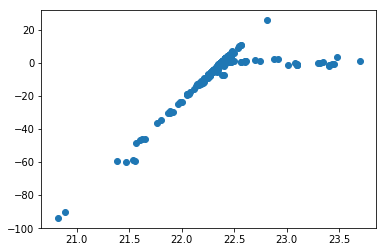

In [192]:
plt.scatter(X, y)

 ### Data Preprocessing - csv


In [223]:
muni_df = pd.read_csv('prediction_samples/muni_prediction_sample.csv')
muni_df.head()

,id,response_time,recorded_time,line_ref,direction_ref,stop_point_ref,scheduled_arrival_time,expected_arrival_time
0,1705,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,38,Outbound,14265,2019-07-24 01:33:55.000000,2019-07-24 01:44:02.000000
1,1706,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,7,Inbound,15311,2019-07-24 01:41:05.000000,2019-07-24 01:44:04.000000
2,1707,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,2,Inbound,16125,2019-07-24 01:41:17.000000,2019-07-24 01:44:05.000000
3,1708,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,38,Outbound,17854,2019-07-24 01:46:17.000000,2019-07-24 01:44:06.000000
4,1709,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,N,Outbound,15205,2019-07-24 01:37:33.000000,2019-07-24 01:44:06.000000


In [199]:
if 'Scheduled Arrival Time' in muni_df.columns:
    muni_df.drop(["Scheduled Arrival Time"], axis  = 1)

if 'Actual Arrival Time' in muni_df.columns:
    muni_df.drop(["Actual Arrival Time"], axis  = 1)

muni_df["Scheduled Arrival Time"] = pd.to_datetime(muni_df["scheduled_arrival_time"])
muni_df["Actual Arrival Time"] = pd.to_datetime(muni_df["expected_arrival_time"])


if 'time_late' in muni_df.columns:
    muni_df.drop(["time late"], axis = 1)

if 'time_early' in muni_df.columns:
    muni_df.drop(["time early"], axis = 1)
    
    
muni_df["time_early"] = muni_df["Scheduled Arrival Time"] - muni_df["Actual Arrival Time"]
muni_df["time_late"] = muni_df["Actual Arrival Time"] - muni_df["Scheduled Arrival Time"]

muni_df["minutes early/(late)"] = muni_df["time_early"]/np.timedelta64(1,"m")
muni_df["minutes_early"] = muni_df["time_early"]/np.timedelta64(1,"m")

muni_df["weekday"] = muni_df["Scheduled Arrival Time"].dt.dayofweek
muni_df["hour"] = muni_df["Scheduled Arrival Time"].dt.hour
muni_df["minute"] = muni_df["Scheduled Arrival Time"].dt.minute
muni_df["time"] = muni_df["hour"] + muni_df["minute"]/60

In [202]:
muni_df

,id,response_time,recorded_time,line_ref,direction_ref,stop_point_ref,scheduled_arrival_time,expected_arrival_time,Scheduled Arrival Time,Actual Arrival Time,time_early,time_late,minutes early/(late),minutes_early,weekday,hour,minute,time
0,1705,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,38,Outbound,14265,2019-07-24 01:33:55.000000,2019-07-24 01:44:02.000000,2019-07-24 01:33:55,2019-07-24 01:44:02,-1 days +23:49:53,00:10:07,-10.116667,-10.116667,2,1,33,1.550000
1,1706,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,7,Inbound,15311,2019-07-24 01:41:05.000000,2019-07-24 01:44:04.000000,2019-07-24 01:41:05,2019-07-24 01:44:04,-1 days +23:57:01,00:02:59,-2.983333,-2.983333,2,1,41,1.683333
2,1707,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,2,Inbound,16125,2019-07-24 01:41:17.000000,2019-07-24 01:44:05.000000,2019-07-24 01:41:17,2019-07-24 01:44:05,-1 days +23:57:12,00:02:48,-2.800000,-2.800000,2,1,41,1.683333
3,1708,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,38,Outbound,17854,2019-07-24 01:46:17.000000,2019-07-24 01:44:06.000000,2019-07-24 01:46:17,2019-07-24 01:44:06,00:02:11,-1 days +23:57:49,2.183333,2.183333,2,1,46,1.766667
4,1709,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,N,Outbound,15205,2019-07-24 01:37:33.000000,2019-07-24 01:44:06.000000,2019-07-24 01:37:33,2019-07-24 01:44:06,-1 days +23:53:27,00:06:33,-6.550000,-6.550000,2,1,37,1.616667
5,1710,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,14,Inbound,15583,2019-07-24 01:41:18.000000,2019-07-24 01:44:07.000000,2019-07-24 01:41:18,2019-07-24 01:44:07,-1 days +23:57:11,00:02:49,-2.816667,-2.816667,2,1,41,1.683333
6,1711,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,2,Outbound,13644,2019-07-24 01:46:05.000000,2019-07-24 01:44:07.000000,2019-07-24 01:46:05,2019-07-24 01:44:07,00:01:58,-1 days +23:58:02,1.966667,1.966667,2,1,46,1.766667
7,1712,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,38,Inbound,15814,2019-07-24 01:45:39.000000,2019-07-24 01:44:07.000000,2019-07-24 01:45:39,2019-07-24 01:44:07,00:01:32,-1 days +23:58:28,1.533333,1.533333,2,1,45,1.750000
8,1713,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,2,Outbound,16609,2019-07-24 01:39:41.000000,2019-07-24 01:44:08.000000,2019-07-24 01:39:41,2019-07-24 01:44:08,-1 days +23:55:33,00:04:27,-4.450000,-4.450000,2,1,39,1.650000
9,1714,2019-07-24 01:44:01.000000,2019-07-24 01:43:48.000000,N,Inbound,15214,2019-07-24 01:38:56.000000,2019-07-24 01:44:08.000000,2019-07-24 01:38:56,2019-07-24 01:44:08,-1 days +23:54:48,00:05:12,-5.200000,-5.200000,2,1,38,1.633333


In [400]:
#FILTER 1 - WEEKDAY

# Get list of weekdays for user
weekday = set(muni_df["weekday"].values)
print(weekday)

# user selects line
selected_weekday = 2

# filter data for selected line
df_1 = pd.DataFrame(columns = muni_df.columns).append(muni_df[muni_df['weekday'] == selected_weekday])


{1, 2, 3}


In [401]:
#FILTER 2 - TIME

# user selects time
selected_time = 18

# filter data for selected line
df_2 = pd.DataFrame(columns = muni_df.columns).append(df_1[df_1['time'] <= selected_time +.5])
df_2 = pd.DataFrame(columns = muni_df.columns).append(df_2[df_2['time'] >= selected_time -.5])


In [402]:
#FILTER 3 - MUNI LINE

# Get list of lines for user
lines = set(df_1["line_ref"].values)
print(lines)

# user selects line
selected_line = 'N'

# filter data for selected line
df_3 = pd.DataFrame(columns = muni_df.columns).append(df_2[df_2['line_ref'] == selected_line])

{'2', '38', 'M', 'N', '14', '7'}


In [403]:
#FILTER 4 - INBOUND / OUTBOUND

# Get list of lines for user
in_out = set(df_2["direction_ref"].values)
print(in_out)

# user selects line
selected_direction = 'Outbound'

# filter data for selected line
df_4 = pd.DataFrame(columns = muni_df.columns).append(df_3[df_3['direction_ref'] == selected_direction])

{'Inbound', 'Outbound'}


In [404]:
#FILTER 5 - MUNI STOP

stops = set(df_3["stop_point_ref"].values)
print(stops)

# user selects line
selected_stop = 17217

# filter data for selected line
df_5 = pd.DataFrame(columns = muni_df.columns).append(df_4[df_4['stop_point_ref'] == selected_stop])

{15123, 13212, 17318, 14506, 17217, 13911, 13913, 15193, 13914, 15196, 15198, 16994, 17252, 15208, 15209, 15210, 15211, 15214, 15216, 15219, 17145, 15225}


In [233]:
# Grab filtered data
selected_muni_df = df_4 #--> using all data for now!

selected_muni_df

,id,response_time,recorded_time,line_ref,direction_ref,stop_point_ref,scheduled_arrival_time,expected_arrival_time,Scheduled Arrival Time,Actual Arrival Time,time_early,time_late,minutes early/(late),minutes_early,weekday,hour,minute,time
204,1909,2019-07-24 02:40:01.000000,2019-07-24 02:39:54.000000,N,Outbound,17217,2019-07-24 02:39:00.000000,2019-07-24 02:40:50.000000,2019-07-24 02:39:00,2019-07-24 02:40:50,-1 days +23:58:10,00:01:50,-1.833333,-1.833333,2,2,39,2.65


In [231]:
# Assign the data to X and y

X = selected_muni_df.time.values.reshape(-1, 1)
y = selected_muni_df.minutes_early.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (252, 1) (252, 1)


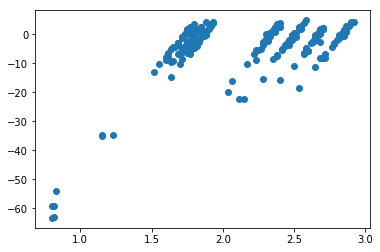

In [232]:
plt.scatter(X, y)

### Data Preprocessing - heroku

In [525]:
muni_df = pd.read_csv('https://muni-db-service.herokuapp.com/data')
muni_df

,Unnamed: 0,id,response_time,recorded_time,line_ref,direction_ref,stop_point_ref,scheduled_arrival_time,expected_arrival_time
0,0,1705,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,38,Outbound,14265,2019-07-23 18:33:55-07:00,2019-07-23 18:44:02-07:00
1,1,1706,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,7,Inbound,15311,2019-07-23 18:41:05-07:00,2019-07-23 18:44:04-07:00
2,2,1707,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,2,Inbound,16125,2019-07-23 18:41:17-07:00,2019-07-23 18:44:05-07:00
3,3,1708,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,38,Outbound,17854,2019-07-23 18:46:17-07:00,2019-07-23 18:44:06-07:00
4,4,1709,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,N,Outbound,15205,2019-07-23 18:37:33-07:00,2019-07-23 18:44:06-07:00
5,5,1710,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,14,Inbound,15583,2019-07-23 18:41:18-07:00,2019-07-23 18:44:07-07:00
6,6,1711,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,2,Outbound,13644,2019-07-23 18:46:05-07:00,2019-07-23 18:44:07-07:00
7,7,1712,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,38,Inbound,15814,2019-07-23 18:45:39-07:00,2019-07-23 18:44:07-07:00
8,8,1713,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,2,Outbound,16609,2019-07-23 18:39:41-07:00,2019-07-23 18:44:08-07:00
9,9,1714,2019-07-23 18:44:01-07:00,2019-07-23 18:43:48-07:00,N,Inbound,15214,2019-07-23 18:38:56-07:00,2019-07-23 18:44:08-07:00


In [526]:
if 'Scheduled Arrival Time' in muni_df.columns:
    muni_df.drop(["Scheduled Arrival Time"], axis  = 1)

if 'Actual Arrival Time' in muni_df.columns:
    muni_df.drop(["Actual Arrival Time"], axis  = 1)

muni_df["Scheduled Arrival Time"] = pd.to_datetime(muni_df["scheduled_arrival_time"])
muni_df["Actual Arrival Time"] = pd.to_datetime(muni_df["expected_arrival_time"])


if 'time_late' in muni_df.columns:
    muni_df.drop(["time late"], axis = 1)

if 'time_early' in muni_df.columns:
    muni_df.drop(["time early"], axis = 1)
    
    
muni_df["time_early"] = muni_df["Scheduled Arrival Time"] - muni_df["Actual Arrival Time"]
muni_df["time_late"] = muni_df["Actual Arrival Time"] - muni_df["Scheduled Arrival Time"]

muni_df["minutes early/(late)"] = muni_df["time_early"]/np.timedelta64(1,"m")
muni_df["minutes_early"] = muni_df["time_early"]/np.timedelta64(1,"m")

muni_df["weekday"] = muni_df["Scheduled Arrival Time"].dt.dayofweek
muni_df["hour"] = muni_df["Scheduled Arrival Time"].dt.hour
muni_df["minute"] = muni_df["Scheduled Arrival Time"].dt.minute
muni_df["time"] = muni_df["hour"] + muni_df["minute"]/60

In [527]:
# clean data to remove outliers
muni_df = pd.DataFrame(columns = muni_df.columns).append(muni_df[muni_df['minutes_early'] <= 100])
muni_df = pd.DataFrame(columns = muni_df.columns).append(muni_df[muni_df['minutes_early'] >= -100])

# Create the bins and bin names
bins = [-100, -20, -10, -5, 0, 100]
late_bins = ["more than 20 min late", "10-20 min late", "5-10 min late", "0-5 min late", "ontime or early"]

muni_df["late bin"] = pd.cut(muni_df["minutes_early"], bins, labels=late_bins)

In [528]:
# Create Classes for output
late_classes = [0, 1, 2, 3, 4]
muni_df["late_classes"] = pd.cut(muni_df["minutes_early"], bins, labels=late_classes)


In [529]:
muni_df_0 = muni_df[["line_ref","direction_ref", "stop_point_ref", "weekday", "time", "late bin"]]

In [530]:
muni_df_0.head()

,line_ref,direction_ref,stop_point_ref,weekday,time,late bin
0,38,Outbound,14265,1,18.550000,10-20 min late
1,7,Inbound,15311,1,18.683333,0-5 min late
2,2,Inbound,16125,1,18.683333,0-5 min late
3,38,Outbound,17854,1,18.766667,ontime or early
4,N,Outbound,15205,1,18.616667,5-10 min late


In [531]:
# Reformat data
data = muni_df_0.values

X1 = data[:, 0]
X2 = data[:, 1]
X3 = data[:, 2]
X4 = data[:, 3]
X5 = data[:, 4]
y = data[:, 5]


In [ ]:
get_dummies

In [548]:
from sklearn.preprocessing import LabelEncoder

# Label-encode data set
label_encoder = LabelEncoder()


label_encoder.fit(X1)
encoded_X1 = label_encoder.transform(X1)

label_encoder.fit(X2)
encoded_X2 = label_encoder.transform(X2)

label_encoder.fit(X3)
encoded_X3 = label_encoder.transform(X3)

label_encoder.fit(X4)
encoded_X4 = label_encoder.transform(X4)

label_encoder.fit(X5)
encoded_X5 = label_encoder.transform(X5)

muni_df_0["line_encoded"] = encoded_X1
muni_df_0["direction_encoded"] = encoded_X2
muni_df_0["stop_encoded"] = encoded_X3
muni_df_0["weekday_encoded"] = encoded_X4
muni_df_0["time_encoded"] = encoded_X5

muni_df_0["late_class"] = muni_df["late_classes"]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

In [549]:
muni_df_0

,line_ref,direction_ref,stop_point_ref,weekday,time,late bin,line_encoded,direction_encoded,stop_encoded,weekday_encoded,time_encoded,late_class
0,38,Outbound,14265,1,18.550000,10-20 min late,2,1,71,0,732,1
1,7,Inbound,15311,1,18.683333,0-5 min late,3,0,202,0,740,3
2,2,Inbound,16125,1,18.683333,0-5 min late,1,0,364,0,740,3
3,38,Outbound,17854,1,18.766667,ontime or early,2,1,453,0,745,4
4,N,Outbound,15205,1,18.616667,5-10 min late,5,1,166,0,736,2
5,14,Inbound,15583,1,18.683333,0-5 min late,0,0,253,0,740,3
6,2,Outbound,13644,1,18.766667,ontime or early,1,1,29,0,745,4
7,38,Inbound,15814,1,18.750000,ontime or early,2,0,345,0,744,4
8,2,Outbound,16609,1,18.650000,0-5 min late,1,1,416,0,738,3
9,N,Inbound,15214,1,18.633333,5-10 min late,5,0,175,0,737,2


In [542]:
# Assign the data to X and y
data = muni_df_0.values

X = data[:, 6:11]
y = data[:, 11]

In [543]:
X

array([[2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1],
       ...,
       [4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5],
       [4, 4, 4, 4, 4]], dtype=object)

In [544]:
y

array([1, 3, 3, ..., 2, 4, 2], dtype=object)

In [545]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# onehotencoder = OneHotEncoder(categorical_features = [0])
# x = onehotencoder.fit_transform(x).toarray()

In [514]:
# from keras.utils import to_categorical

# # One-hot encoding
# one_hot_X1 = to_categorical(encoded_X1)
# one_hot_X2 = to_categorical(encoded_X2)
# one_hot_X3 = to_categorical(encoded_X3)
# one_hot_X4 = to_categorical(encoded_X4)
# one_hot_X5 = to_categorical(encoded_X5)


# # muni_df_0["line_hot"] = one_hot_X1
# # muni_df_0["direction_hot"] = one_hot_X1
# # muni_df_0["stop_hot"] = one_hot_X1
# # muni_df_0["weekday_hot"] = one_hot_X1
# # muni_df_0["time_hot"] = one_hot_X1

# one_hot_X1


array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [546]:
# # Create Levels for categories
# from sklearn.preprocessing import OneHotEncoder
# onehotencoder = OneHotEncoder(categorical_features = ["direction_ref"])
# muni_df = onehotencoder.fit_transform(muni_df).toarray()

In [535]:
# Assign the data to X and y

X = muni_df.time.values
y = muni_df.minutes_early

print("Shape: ", X.shape, y.shape)

Shape:  (12362,) (12362,)


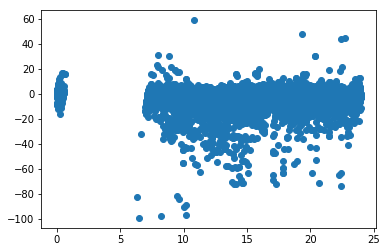

In [536]:
plt.scatter(X, y)

In [ ]:
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

In [409]:
# Assign the data to X and y

X = selected_muni_df.time.values.reshape(-1, 1)
y = selected_muni_df.minutes_early.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (160, 1) (160, 1)


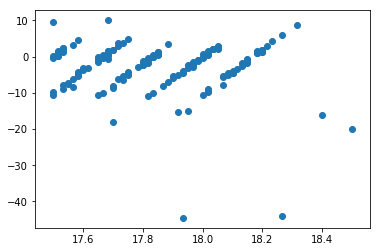

In [410]:
plt.scatter(X, y)

In [424]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## MACHINE LEARNING USING NEURAL NETWORKS

For this data, we are selecting a multi-lable classification model
 
 K-nearest neighbours
 Xxtreme gradient boost
 SVM
 Decision Trees (Random Forest)
 Neural Network

### Data Preprocessing

In [425]:
# Create scaler

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [426]:
# Scale both the test and the train data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [427]:
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

IndexError: index -15 is out of bounds for axis 1 with size 10

### Creating our Model
For numerical data, we use a regressor model.
For categorical data, we use a classifier model.

In [ ]:
Multi-label classification


### Defining our Model Architecture (the layers)

In [416]:
# create a sequential model

from keras.models import Sequential
model = Sequential()

In [418]:
# add first layer. Specify both the number of inputs and the number of nodes in the hidden layer.

from keras.layers import Dense
number_inputs = 3
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [419]:
# Specify the activation function (typically softmax for classification)and 
# the number of classes (labels) that we are trying to predict in output layer

number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))

### Model Summary

In [420]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 16        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [422]:
# compile the model using a loss function and optimizer

model.compile(optimizer='adam',
              loss='categorical_crossentropy', # if output layer is linear, use loss = 'mse' (mean squared error)
              metrics=['accuracy'])

### Training the Model

In [423]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,  # number of itterations (loops)
    shuffle=True,
    verbose=2
)

NameError: name 'X_train_scaled' is not defined

### Quantify the Data

In [ ]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

### Making predictions with New Data

In [ ]:
import numpy as np
new_data = np.array([[0.2, 0.3, 0.4]])
print(f"Predicted class: {model.predict_classes(new_data)}")